In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd

In [2]:
drive.mount("/content/drive/")  #Para acceder a los archivos en drive

Mounted at /content/drive/


In [3]:
#Cargando la base de datos
houses=np.loadtxt("/content/drive/MyDrive/Data/houses.txt",delimiter=',')
Xh=houses[:,:4]
th=houses[:,4] #Costo de la Casa"

labels=['Tamaño', 'Habitaciones', 'Pisos', 'Años']

In [4]:
Xh.shape

(100, 4)

In [5]:
scaler = StandardScaler()
Xh_norm = scaler.fit_transform(Xh)  #Para normalizar los datos

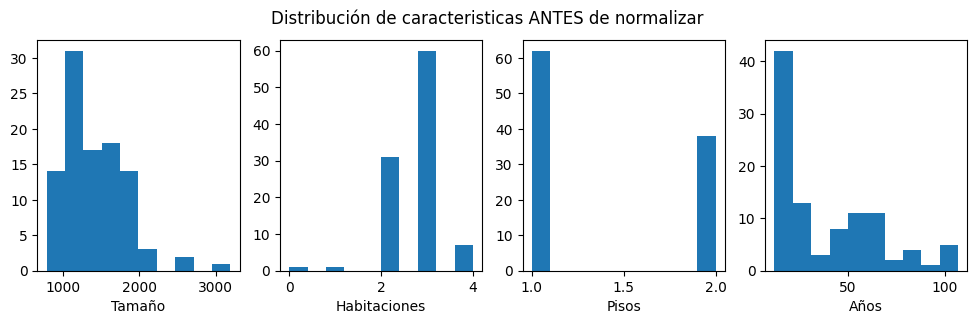

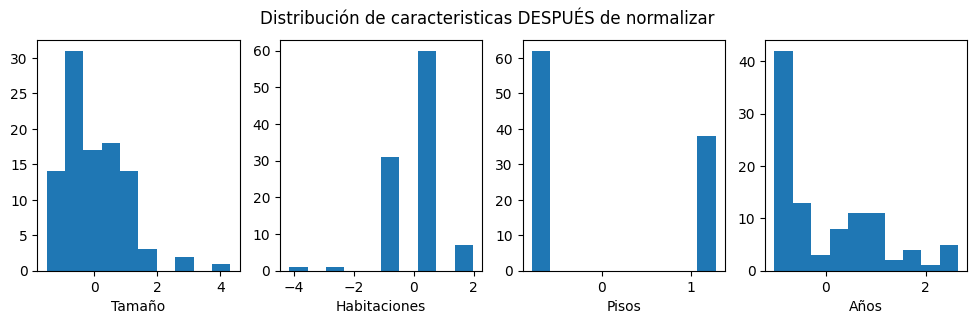

In [6]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    ax[i].hist(Xh[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle('Distribución de caracteristicas ANTES de normalizar')
plt.show()


fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    ax[i].hist(Xh_norm[:,i])
    ax[i].set_xlabel(labels[i])
fig.suptitle('Distribución de caracteristicas DESPUÉS de normalizar')
plt.show()

In [7]:
sgdr = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
sgdr.fit(Xh_norm, th)

print(sgdr)
print(f'Number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}')

SGDRegressor(learning_rate='constant')
Number of iterations completed: 19, number of weight updates: 1901.0


In [8]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:  w: {w0_norm}, b:{w_norm}")

model parameters:  w: [362.54143223], b:[110.47716948 -21.79222298 -32.82325771 -37.65700234]


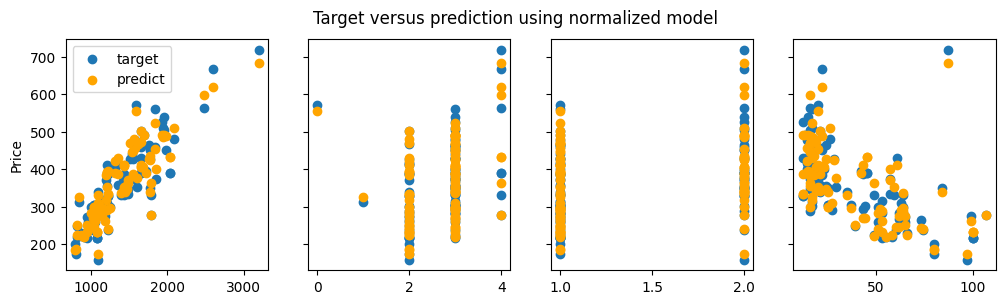

In [9]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*Xh_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(Xh[:,i],th, label = 'target')
    ax[i].scatter(Xh[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle('Target versus prediction using normalized model')
plt.show()

# **Using libraries**

Split in train and test samples

In [10]:
X_train, X_test, y_train, y_test = train_test_split(Xh_norm, th, test_size=0.30, random_state=42)

In [11]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 24, number of weight updates: 1681.0


In [12]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:    w: {w0_norm}, b:{w_norm}")

model parameters:    w: [361.32885782], b:[109.93078081 -22.26404159 -34.84097948 -38.91873183]


In [13]:
#Test score
sgdr.score(X_test,y_test)

0.9622041472348392

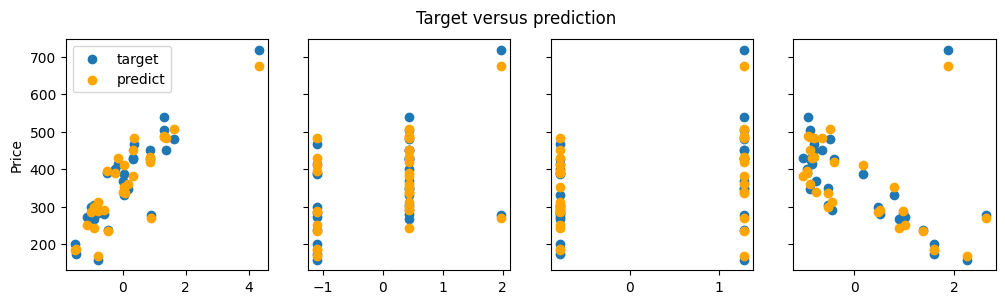

In [14]:
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_test[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle('Target versus prediction')
plt.show()

# Usando KERAS

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)

model = Sequential()

In [16]:
input_dim = 4
output_dim = 1

model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)

model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
num_epochs = 100
batch_size =X_train.shape[0] #30
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 1s 831ms/step - loss: 140385.1562
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 134797.5156
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 129438.4844
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 124298.5312
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 119368.4453
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 114639.4766
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 110103.2266
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 105751.6875
Epoch 9/100
1/1 [==============================] - 0s 21ms/step - loss: 101577.1406
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 97572.2656
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 93730.0078
Epoch 12/100
1/1 [==============================] - 0s 43ms/step - loss: 90

In [18]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 59.242264 ]
 [  0.3929231]
 [-14.859886 ]
 [-49.60262  ]] [312.59824]


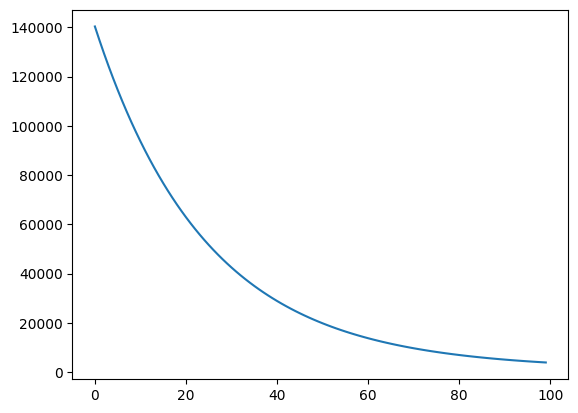

In [19]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)

# use Pandas native plot method
history_df['loss'].plot();

In [20]:
history2= model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
1/1 [==============================] - 0s 29ms/step - loss: 3793.9536
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 3690.9719
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 3591.7397
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 3496.1111
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 3403.9473
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 3315.1133
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 3229.4768
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 3146.9165
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 3067.3137
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 2990.5508
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 2916.5208
Epoch 12/100
1/1 [==============================] - 0s 29ms/step - loss: 2845.1152
Epoch 13/100


In [21]:
capas = model.layers[0]
w, b = capas.get_weights()
print(w,b)

[[ 82.45567 ]
 [ -9.622737]
 [-23.731758]
 [-47.30757 ]] [354.1084]


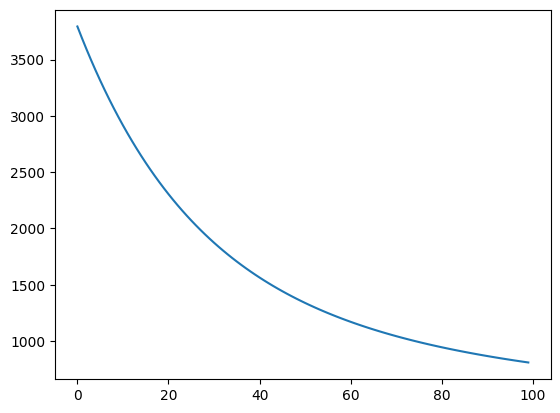

In [22]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history2.history)

# use Pandas native plot method
history_df['loss'].plot();

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
score

1174.7750244140625

In [24]:
yp = model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


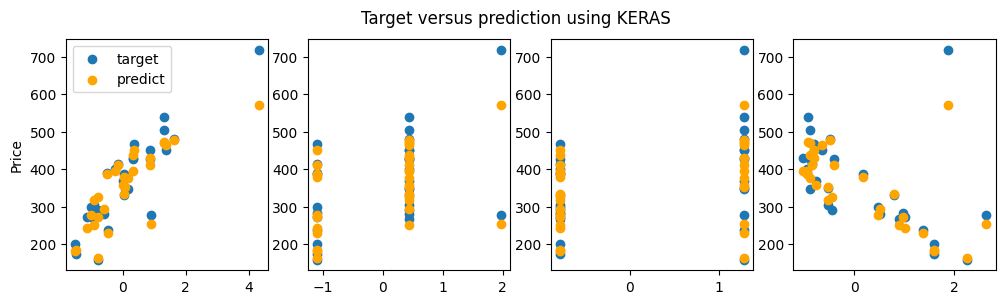

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(12, 3))

for i in range(len(ax)):
    ax[i].scatter(X_test[:,i],y_test, label = 'target')
    ax[i].scatter(X_test[:,i],yp,color="orange", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle('Target versus prediction using KERAS')
plt.show()